#

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#install
!pip install mlxtend

#association rule minning
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [29]:
#loading the dataset
idmb = pd.read_csv('idmb_cleaned.csv')
idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,2.881524e+07,2278845,9.3
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175.0,USA,R,Francis Ford Coppola,2.461210e+08,1572674,9.2
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220.0,USA,R,Francis Ford Coppola,4.080358e+08,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,2.228318e+08,1780147,8.9


In [4]:
#all data type goes back to string unless changed in notebook
idmb.dtypes

,0
IMBD title ID,object
Original titlÊ,object
Release year,object
Genrë¨,object
Duration,float64
Country,object
Content Rating,object
Director,object
Income,float64
Votes,int64


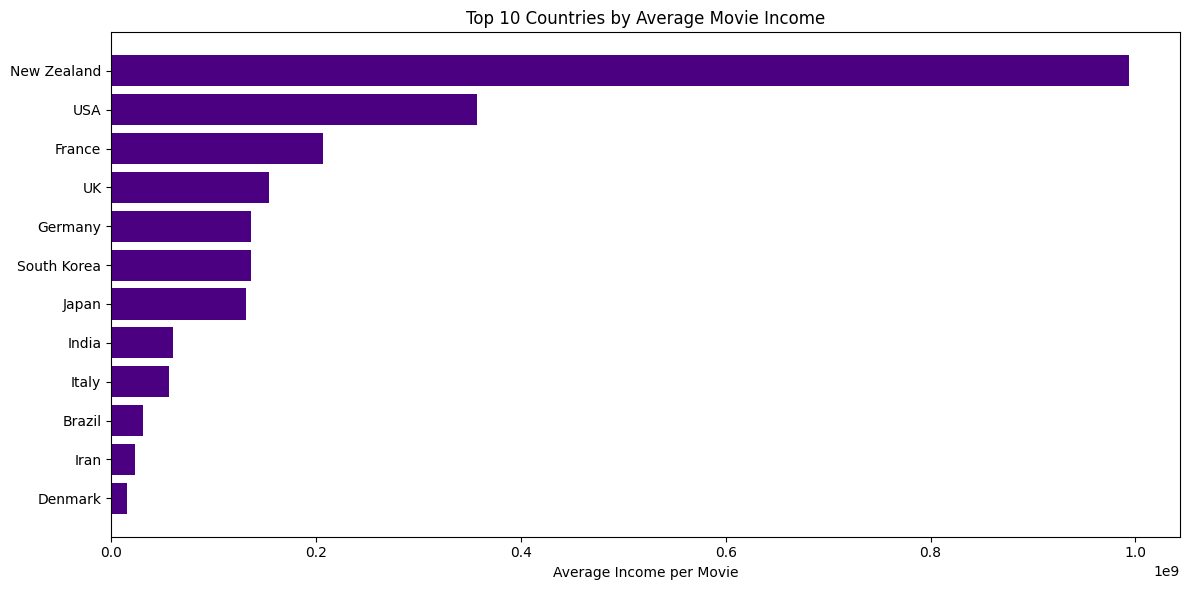

In [28]:
#calculating the company with the highest Income per movie
summary_income = idmb.groupby('Country').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean'),
    Total_Vote = ('Votes', 'sum'),
    Average_Score = ('Score', 'mean')
)


average_sorted_data = summary_income.sort_values(by='Average_Income', ascending=False)

#visualization of country with highest income per movie
plt.figure(figsize=(12, 6))
plt.barh(average_sorted_data.index, average_sorted_data['Average_Income'], color='indigo')
plt.xlabel('Average Income per Movie')
plt.title('Top Countries by Average Movie Income')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

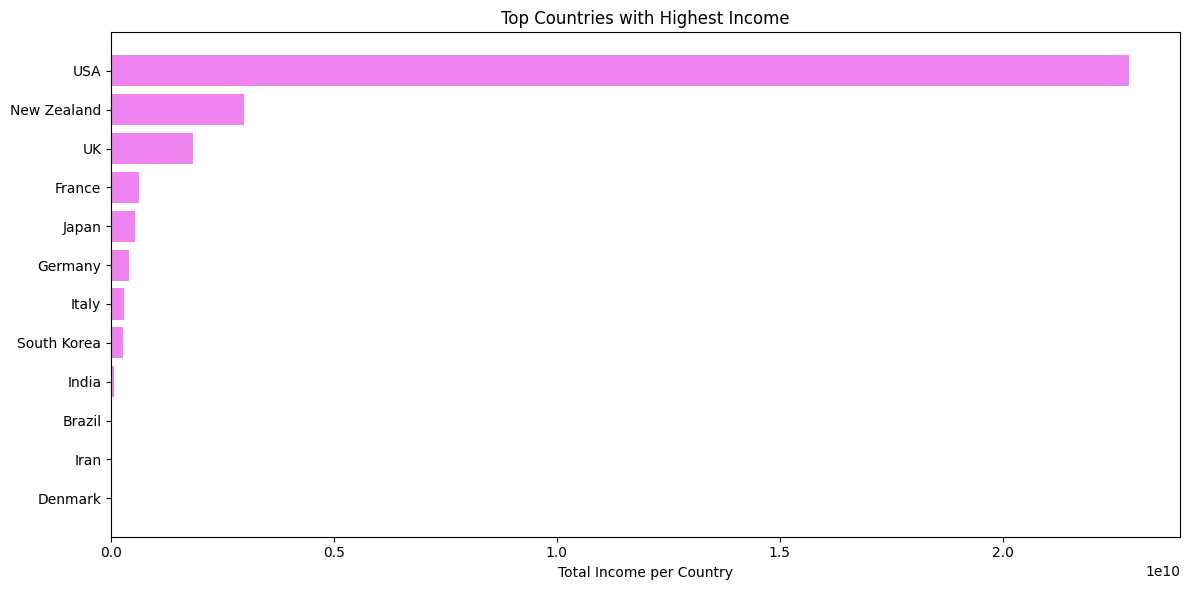

In [30]:
#the country that generated the most income overall
total_sorted_data = summary_income.sort_values(by='Total_Income', ascending=False)

#visualization of country with highest income per movie
plt.figure(figsize=(12, 6))
plt.barh(total_sorted_data.index, total_sorted_data['Total_Income'], color='violet')
plt.xlabel('Total Income per Country')
plt.title('Top Countries with Highest Income')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

Therefore New Zealand mad the highest income per movie, while USA had the overall highest income with New Zealand behind

In [7]:
summary_rating = idmb.groupby('Content Rating').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
)
summary_rating.sort_values(by='Average_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income
Content Rating,,,
PG-13,12,7.615279e+09,6.346066e+08
G,6,3.030506e+09,5.050843e+08
Unrated,25,8.634559e+09,3.453823e+08
PG,11,3.156417e+09,2.869470e+08
R,45,7.450537e+09,1.655675e+08
Approved,1,2.525248e+07,2.525248e+07


In [8]:
summary_rating.sort_values(by='Total_Income', ascending=False)

,Movie_Count,Total_Income,Average_Income
Content Rating,,,
Unrated,25,8.634559e+09,3.453823e+08
PG-13,12,7.615279e+09,6.346066e+08
R,45,7.450537e+09,1.655675e+08
PG,11,3.156417e+09,2.869470e+08
G,6,3.030506e+09,5.050843e+08
Approved,1,2.525248e+07,2.525248e+07


In [9]:
idmb_country_rating = idmb.groupby('Country')['Content Rating'].value_counts().unstack(fill_value=0)
idmb_country_rating

Content Rating,Approved,G,PG,PG-13,R,Unrated
Country,,,,,,
Brazil,0,0,0,0,1,0
Denmark,0,0,0,0,1,0
France,0,0,0,0,1,2
Germany,0,0,0,0,3,0
India,0,0,0,0,0,1
Iran,0,0,0,1,0,0
Italy,1,0,0,1,0,3
Japan,0,0,1,1,0,2
New Zealand,0,0,0,3,0,0


In [10]:
country_summary = pd.merge(summary_income, idmb_country_rating, on = 'Country')
country_summary


,Movie_Count,Total_Income,Average_Income,Total_Vote,Average_Score,Approved,G,PG,PG-13,R,Unrated
Country,,,,,,,,,,,
Brazil,1,3.068079e+07,3.068079e+07,685856,8.600000,0,0,0,0,1,0
Denmark,1,1.584327e+07,1.584327e+07,269616,7.500000,0,0,0,0,1,0
France,3,6.200659e+08,2.066886e+08,2434769,8.200000,0,0,0,0,1,2
Germany,3,4.103003e+08,1.367668e+08,1806027,7.866667,0,0,0,0,3,0
India,1,6.026284e+07,6.026284e+07,332217,8.100000,0,0,0,0,0,1
Iran,1,2.292608e+07,2.292608e+07,214165,7.400000,0,0,0,1,0,0
Italy,5,2.842908e+08,5.685815e+07,2022456,8.280000,1,0,0,1,0,3
Japan,4,5.260924e+08,1.315231e+08,1491134,8.375000,0,0,1,1,0,2
New Zealand,3,2.981433e+09,9.938109e+08,4673978,8.800000,0,0,0,3,0,0


In [11]:
#print top 10 movies with the country
idmb.sort_values(by = 'Income', ascending = False).head(10)

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
57,tt4154796,Avengers: Endgame,2019-04-24,"Action, Adventure, Drama",181.0,USA,Unrated,"Anthony Russo, Joe Russo",2.797801e+09,754786,8.2
55,tt4154756,Avengers: Infinity War,2018-04-25,"Action, Adventure, Sci-Fi",149.0,USA,Unrated,"Anthony Russo, Joe Russo",2.048360e+09,796486,8.2
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,"Action, Adventure, Drama",201.0,New Zealand,PG-13,Peter Jackson,1.142271e+09,1604280,8.9
49,tt1345836,The Dark Knight Rises,2012-08-29,"Action, Adventure",164.0,UK,PG-13,Christopher Nolan,1.081133e+09,1480582,8.3
39,tt7286456,Joker,2019-10-03,"Crime, Drama, Thriller",122.0,USA,Unrated,Todd Phillips,1.074251e+09,855097,8.4
81,tt0435761,Toy Story 3,2010-07-07,"Animation, Adventure, Comedy",103.0,USA,G,Lee Unkrich,1.066970e+09,739717,7.8
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
38,tt0110357,The Lion King,1994-11-25,"Animation, Adventure, Drama",88.0,USA,G,"Roger Allers, Rob Minkoff",9.685118e+08,917248,8.4
14,tt0167261,The Lord of the Rings: The Two Towers,2003-01-16,"Action, Adventure, Drama",179.0,New Zealand,PG-13,Peter Jackson,9.512274e+08,1449778,8.7
11,tt0120737,The Lord of the Rings: The Fellowship of the Ring,2002-01-18,"Action, Adventure, Drama",178.0,New Zealand,PG-13,Peter Jackson,8.879343e+08,1619920,8.8


In [12]:
idmb.shape

(100, 11)

In [13]:
# Split by comma, strip spaces, and flatten into one list
all_genre = idmb['Genrë¨'].str.split(',').explode().str.strip()
all_genre

,Genrë¨
0,Drama
1,Crime
1,Drama
2,Action
2,Crime
...,...
97,Western
98,Drama
99,Comedy
99,Musical


In [14]:
genre_unique = all_genre.unique()
genre_unique

array(['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History',
       'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Mystery', 'Thriller',
       'War', 'Animation', 'Family', 'Comedy', 'Music', 'Horror',
       'Film-Noir', 'Musical'], dtype=object)

In [15]:
all_genre.value_counts()

,count
Genrë¨,
Drama,67
Adventure,29
Crime,21
Action,20
Comedy,14
Thriller,13
Mystery,12
Sci-Fi,12
Animation,9


In [16]:
#all USA movies
idmb_USA = idmb[(idmb['Country'].isin(['USA']))]
idmb_USA.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142.0,USA,R,Frank Darabont,2.881524e+07,2278845,9.3
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175.0,USA,R,Francis Ford Coppola,2.461210e+08,1572674,9.2
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152.0,USA,PG-13,Christopher Nolan,1.005455e+09,2241615,9.0
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220.0,USA,R,Francis Ford Coppola,4.080358e+08,1098714,9.0
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,2.228318e+08,1780147,8.9


In [17]:
idmb_USA['Genrë¨'].value_counts()

,count
Genrë¨,
"Crime, Drama",7
Drama,5
"Crime, Drama, Thriller",4
"Biography, Drama, History",3
"Action, Adventure, Fantasy",3
"Action, Adventure, Sci-Fi",3
"Action, Adventure, Drama",2
"Drama, Romance",2
"Drama, War",2


Now using association rule minning to determine which genre of movie is most marketable.
The object
1. Determine genre with high Income (genre together and single) - make income atleast.
2. Genre attracts more people to view
3. Genre with more positive review

In [18]:
#encode the genre column
genre = idmb['Genrë¨'].str.get_dummies(sep = ',')

#remove whitespaces
genre.columns = genre.columns.str.strip()

genre

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Horror,Mystery,Western
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
96,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
#setting the threshold
income_threshold = idmb['Income'].median()
votes_threshold = idmb['Votes'].median()
score_threshold = idmb['Score'].median()

#setting maximum values for each objective
idmb['High_Income'] = idmb['Income'] >= income_threshold
idmb['High_Votes'] = idmb['Votes'] >= votes_threshold
idmb['High_Score'] = idmb['Score'] >= score_threshold

In [20]:
#combining genre one-hot encoding with target labels
genre_features = pd.concat([genre, idmb[['High_Income', 'High_Votes', 'High_Score']]], axis = 1)
genre_features.head()

,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,...,Biography,Comedy,Crime,Drama,Horror,Mystery,Western,High_Income,High_Votes,High_Score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,False,True,True
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,True,True,True
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,True,True,True


In [21]:
#generate frequent itemsets
frequent_items = apriori(genre_features, min_support = 0.05, use_colnames = True)

#generating rules with at least one of the target labels as the consequent
rules = association_rules(frequent_items, metric = 'confidence', min_threshold = 0.6)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Adventure),(Drama),0.07,0.25,0.07,1.000000,4.000000,1.0,0.0525,inf,0.806452,0.280000,1.000000,0.640000
1,(Action),(Adventure),0.19,0.07,0.14,0.736842,10.526316,1.0,0.1267,3.534000,1.117284,1.166667,0.717035,1.368421
2,(Adventure),(Action),0.07,0.19,0.14,2.000000,10.526316,1.0,0.1267,inf,0.973118,1.166667,2.234568,1.368421
3,(Animation),(Adventure),0.09,0.07,0.08,0.888889,12.698413,1.0,0.0737,8.370000,1.012363,1.000000,0.880526,1.015873
4,(Adventure),(Animation),0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,"(High_Votes, Crime)","(High_Score, Drama, High_Income)",0.10,0.20,0.08,0.800000,4.000000,1.0,0.0600,4.000000,0.833333,0.363636,0.750000,0.600000
295,"(High_Score, Drama)","(High_Votes, High_Income, Crime)",0.12,0.08,0.08,0.666667,8.333333,1.0,0.0704,2.760000,1.000000,0.666667,0.637681,0.833333
296,"(High_Score, Crime)","(High_Votes, Drama, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
297,"(Drama, High_Income)","(High_Votes, Crime, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873


In [22]:
#filter for rules where High Income, High Votes or High Score is the consequence
rules_target = rules[rules['consequents'].apply(lambda x: any(item in x for item in ['High_Income', 'High_Votes', 'High_Score']))]

rules_target

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(Adventure),(High_Income),0.07,0.50,0.21,3.000000,6.000000,1.0,0.1750,inf,0.896057,0.583333,5.000000,1.710000
6,(Adventure),(High_Votes),0.07,0.50,0.15,2.142857,4.285714,1.0,0.1150,inf,0.824373,0.357143,3.285714,1.221429
7,(Adventure),(High_Score),0.07,0.51,0.11,1.571429,3.081232,1.0,0.0743,inf,0.726295,0.234043,2.166181,0.893557
12,(Fantasy),(High_Income),0.06,0.50,0.05,0.833333,1.666667,1.0,0.0200,3.000000,0.425532,0.098039,0.666667,0.466667
13,(Sci-Fi),(High_Income),0.12,0.50,0.08,0.666667,1.333333,1.0,0.0200,1.500000,0.284091,0.148148,0.333333,0.413333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,"(High_Votes, Crime)","(High_Score, Drama, High_Income)",0.10,0.20,0.08,0.800000,4.000000,1.0,0.0600,4.000000,0.833333,0.363636,0.750000,0.600000
295,"(High_Score, Drama)","(High_Votes, High_Income, Crime)",0.12,0.08,0.08,0.666667,8.333333,1.0,0.0704,2.760000,1.000000,0.666667,0.637681,0.833333
296,"(High_Score, Crime)","(High_Votes, Drama, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
297,"(Drama, High_Income)","(High_Votes, Crime, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873


Confidence: probability of outcome given the genre combination

Lift:how much likely the outcome is compared to random chance

support: proportion of movies with that genre combo.

In [23]:
rules_target.sort_values(by = 'lift', ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
55,(Adventure),"(Animation, High_Income)",0.07,0.08,0.08,1.142857,14.285714,1.0,0.0744,inf,1.000000,1.142857,1.155280,1.071429
132,(Adventure),"(High_Votes, Drama, High_Income)",0.07,0.06,0.06,0.857143,14.285714,1.0,0.0558,6.580000,1.000000,0.857143,0.848024,0.928571
286,"(High_Votes, Crime, High_Score)","(Drama, High_Income)",0.09,0.07,0.08,0.888889,12.698413,1.0,0.0737,8.370000,1.012363,1.000000,0.880526,1.015873
297,"(Drama, High_Income)","(High_Votes, Crime, High_Score)",0.07,0.09,0.08,1.142857,12.698413,1.0,0.0737,inf,0.990591,1.000000,1.156986,1.015873
298,"(High_Income, Crime)","(High_Votes, Drama, High_Score)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000
285,"(High_Votes, Drama, High_Score)","(High_Income, Crime)",0.08,0.08,0.08,1.000000,12.500000,1.0,0.0736,inf,1.000000,1.000000,1.000000,1.000000
33,(Adventure),"(Drama, High_Income)",0.07,0.07,0.06,0.857143,12.244898,1.0,0.0551,6.510000,0.987455,0.750000,0.846390,0.857143
296,"(High_Score, Crime)","(High_Votes, Drama, High_Income)",0.11,0.06,0.08,0.727273,12.121212,1.0,0.0734,3.446667,1.030899,0.888889,0.709865,1.030303
288,"(High_Votes, Drama, High_Income)","(High_Score, Crime)",0.06,0.11,0.08,1.333333,12.121212,1.0,0.0734,inf,0.976064,0.888889,1.374532,1.030303
245,(Adventure),"(High_Votes, Drama, High_Income, Action)",0.07,0.06,0.05,0.714286,11.904762,1.0,0.0458,3.290000,0.984946,0.625000,0.696049,0.773810


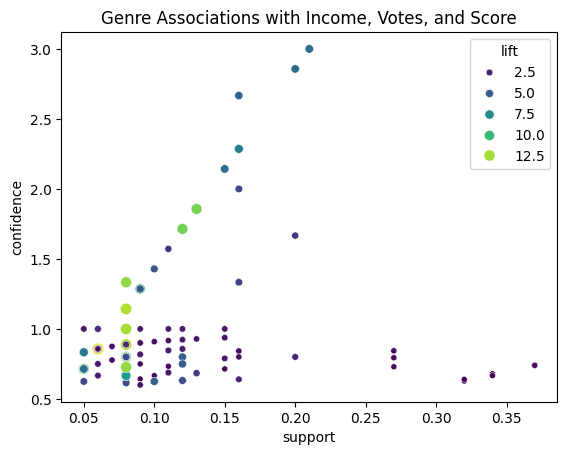

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rules_target, x='support', y='confidence', size='lift', hue='lift', palette='viridis')
plt.title('Genre Associations with Income, Votes, and Score')
plt.show()
